In [1]:
import tkinter as tk
from tkinter import filedialog
import random
import math
import numpy as np

In [2]:
def select_file():
    root = tk.Tk()
    root.withdraw()  # Hide the root window (we only want the file dialog)
    file_path = filedialog.askopenfilename(
        title="Select a file", 
        filetypes=[("Text files", "*.txt")]
    )
    return file_path

In [3]:
def parse_input(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Initialize variables
    vehicle_capacity = None
    customers = []

    # Extract vehicle capacity by looking for the "CAPACITY" line
    for i, line in enumerate(lines):
        if "CAPACITY" in line:
            # Get the next line for the actual values
            values_line = lines[i + 1].strip().split()
            vehicle_capacity = int(values_line[1])  # Extract the capacity value
            break

    if vehicle_capacity is None:
        raise ValueError("Vehicle capacity not found in the input file.")

    # Locate the start of the customer data
    start_index = None
    for i, line in enumerate(lines):
        if "CUST NO." in line:
            start_index = i + 1  # Data starts immediately after this line
            break

    if start_index is None:
        raise ValueError("Customer data section not found in file.")

    # Parse customer data
    for line in lines[start_index:]:
        data = line.strip().split()
        if len(data) < 7:  # Ignore lines without sufficient data
            continue
        try:
            customer = {
                "id": int(data[0]),
                "x": float(data[1]),
                "y": float(data[2]),
                "demand": int(data[3]),
                "ready_time": int(data[4]),
                "due_date": int(data[5]),
                "service_time": int(data[6])
            }
            customers.append(customer)
        except ValueError:
            # Skip malformed lines
            continue

    return vehicle_capacity, customers

In [4]:
# Function to calculate Euclidean distance between two customers
def euclidean_distance(cust1, cust2):
    return math.sqrt((cust1['x'] - cust2['x'])**2 + (cust1['y'] - cust2['y'])**2)

# Function to calculate travel time (using Euclidean distance as a proxy for time)
def calculate_travel_time(customers):
    """Create a time matrix based on travel distance."""
    num_customers = len(customers)
    time_matrix = [[0] * num_customers for _ in range(num_customers)]
    for i in range(num_customers):
        for j in range(num_customers):
            time_matrix[i][j] = euclidean_distance(customers[i], customers[j])
    return time_matrix

In [5]:
# Genetic Algorithm helpers
def generate_initial_population(population_size, num_customers):
    population = []
    for _ in range(population_size):
        individual = list(range(num_customers))
        random.shuffle(individual)
        population.append(individual)
    return population

In [6]:
def fitness(individual, dist_matrix, vehicle_capacity, customers):
    total_distance = 0
    total_demand = 0
    num_vehicles = 1  # Start with one vehicle
    
    for i in range(len(individual) - 1):
        current_customer = customers[individual[i]]
        next_customer = customers[individual[i + 1]]
        
        total_distance += dist_matrix[individual[i]][individual[i + 1]]
        total_demand += current_customer['demand']
        
        # Check if we exceed the vehicle's capacity
        if total_demand > vehicle_capacity:
            num_vehicles += 1
            total_demand = next_customer['demand']  # Start with the next customer's demand
            
    return total_distance  # You can modify to add penalty based on vehicles used

In [7]:
def crossover(parent1, parent2):
    # Perform crossover between two parents (partially mapped crossover)
    size = len(parent1)
    child = [-1] * size
    crossover_point = random.randint(0, size)
    
    # Copy part of the first parent to the child
    for i in range(crossover_point):
        child[i] = parent1[i]
    
    # Fill the remaining part with genes from the second parent
    for i in range(size):
        if child[i] == -1:
            for gene in parent2:
                if gene not in child:
                    child[i] = gene
                    break
    return child

File selected: C:/Users/chola/Documents/college/CESI/workshops/AA/PROJECT/c1/c101.txt
Generation 1, Best Fitness: 3619.892982260907
Generation 2, Best Fitness: 3557.3615819404545
Generation 3, Best Fitness: 3346.8575172354763
Generation 4, Best Fitness: 3413.2310666847666
Generation 5, Best Fitness: 3403.4909312187156
Generation 6, Best Fitness: 3337.8059549749123
Generation 7, Best Fitness: 3223.5906034281825
Generation 8, Best Fitness: 3250.716430296371
Generation 9, Best Fitness: 3318.619630007749
Generation 10, Best Fitness: 3243.952379337507
Generation 11, Best Fitness: 3203.3250637838028
Generation 12, Best Fitness: 3126.4976379359455
Generation 13, Best Fitness: 3078.1173610869982
Generation 14, Best Fitness: 3046.3647303162584
Generation 15, Best Fitness: 3069.768693823553
Generation 16, Best Fitness: 3084.4572486290645
Generation 17, Best Fitness: 3083.3901360645905
Generation 18, Best Fitness: 3051.0001523775663
Generation 19, Best Fitness: 3048.6398285341784
Generation 20, B

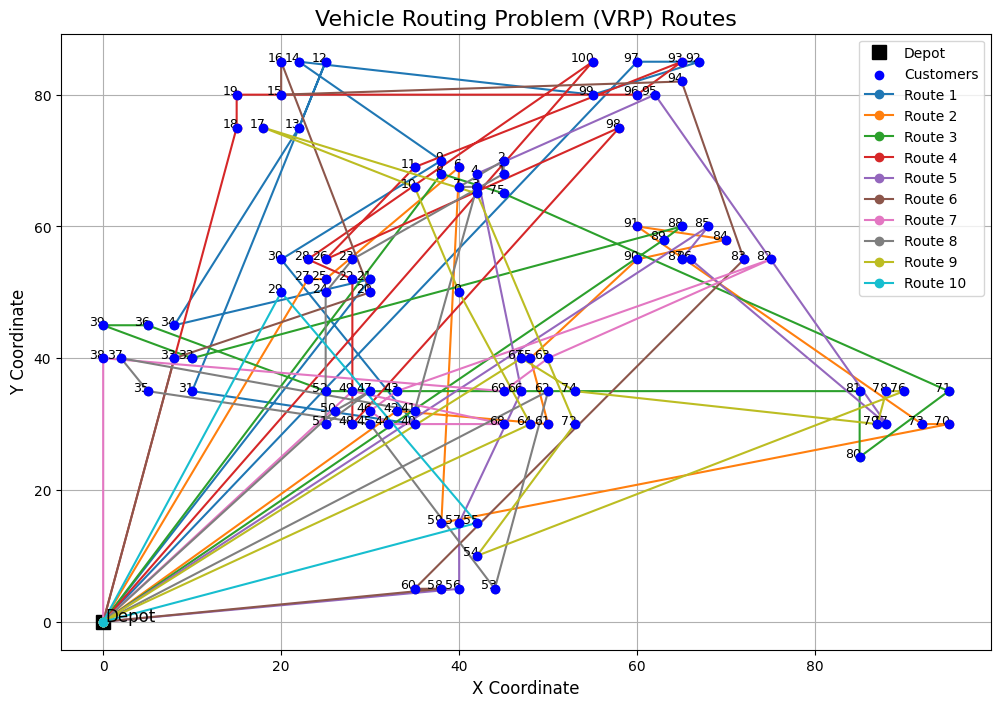

In [14]:
import tkinter as tk
from tkinter import filedialog
import random
import math
import numpy as np

# Function to open file dialog and select a file
def select_file():
    root = tk.Tk()
    root.withdraw()  # Hide the root window (we only want the file dialog)
    file_path = filedialog.askopenfilename(
        title="Select a file", 
        filetypes=[("Text files", "*.txt")]
    )
    return file_path

# Function to parse the input file and extract vehicle capacity and customer data
def parse_input(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Initialize variables
    vehicle_capacity = None
    customers = []

    # Extract vehicle capacity by looking for the "CAPACITY" line
    for i, line in enumerate(lines):
        if "CAPACITY" in line:
            # Get the next line for the actual values
            values_line = lines[i + 1].strip().split()
            vehicle_capacity = int(values_line[1])  # Extract the capacity value
            break

    if vehicle_capacity is None:
        raise ValueError("Vehicle capacity not found in the input file.")

    # Locate the start of the customer data
    start_index = None
    for i, line in enumerate(lines):
        if "CUST NO." in line:
            start_index = i + 1  # Data starts immediately after this line
            break

    if start_index is None:
        raise ValueError("Customer data section not found in file.")

    # Parse customer data
    for line in lines[start_index:]:
        data = line.strip().split()
        if len(data) < 7:  # Ignore lines without sufficient data
            continue
        try:
            customer = {
                "id": int(data[0]),
                "x": float(data[1]),
                "y": float(data[2]),
                "demand": int(data[3]),
                "ready_time": int(data[4]),
                "due_date": int(data[5]),
                "service_time": int(data[6])
            }
            customers.append(customer)
        except ValueError:
            # Skip malformed lines
            continue

    return vehicle_capacity, customers

# Function to calculate Euclidean distance between two customers
def euclidean_distance(cust1, cust2):
    return math.sqrt((cust1['x'] - cust2['x'])**2 + (cust1['y'] - cust2['y'])**2)

# Function to calculate travel time (using Euclidean distance as a proxy for time)
def calculate_travel_time(cust1, cust2):
    # Assuming travel time is proportional to the Euclidean distance (you can adjust this)
    return euclidean_distance(cust1, cust2)

# Genetic Algorithm helpers
def generate_initial_population(population_size, num_customers):
    population = []
    for _ in range(population_size):
        individual = list(range(num_customers))
        random.shuffle(individual)
        population.append(individual)
    return population

def fitness(individual, dist_matrix, vehicle_capacity, customers):
    total_distance = 0
    total_demand = 0
    num_vehicles = 1  # Start with one vehicle
    
    for i in range(len(individual) - 1):
        current_customer = customers[individual[i]]
        next_customer = customers[individual[i + 1]]
        
        total_distance += dist_matrix[individual[i]][individual[i + 1]]
        total_demand += current_customer['demand']
        
        # Check if we exceed the vehicle's capacity
        if total_demand > vehicle_capacity:
            num_vehicles += 1
            total_demand = next_customer['demand']  # Start with the next customer's demand
            
    return total_distance  # You can modify to add penalty based on vehicles used

def crossover(parent1, parent2):
    # Perform crossover between two parents (partially mapped crossover)
    size = len(parent1)
    child = [-1] * size
    crossover_point = random.randint(0, size)
    
    # Copy part of the first parent to the child
    for i in range(crossover_point):
        child[i] = parent1[i]
    
    # Fill the remaining part with genes from the second parent
    for i in range(size):
        if child[i] == -1:
            for gene in parent2:
                if gene not in child:
                    child[i] = gene
                    break
    return child

def mutate(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        # Randomly choose two positions to swap
        pos1, pos2 = random.sample(range(len(individual)), 2)
        individual[pos1], individual[pos2] = individual[pos2], individual[pos1]
    return individual

def select_parents(population, dist_matrix, vehicle_capacity, customers):
    # Tournament selection: select the best two individuals
    tournament_size = 5
    selected = random.sample(population, tournament_size)
    selected.sort(key=lambda x: fitness(x, dist_matrix, vehicle_capacity, customers))
    return selected[0], selected[1]

# Function to solve the VRP with Time Windows using Genetic Algorithm
def solve_vrptw(file_path):
    vehicle_capacity, customers = parse_input(file_path)
    num_customers = len(customers)
    
    # Create distance matrix
    dist_matrix = np.zeros((num_customers, num_customers))
    for i in range(num_customers):
        for j in range(num_customers):
            dist_matrix[i][j] = calculate_travel_time(customers[i], customers[j])
    
    # Genetic algorithm parameters
    population_size = 50
    generations = 100
    mutation_rate = 0.1
    
    # Initialize population
    population = generate_initial_population(population_size, num_customers)
    
    # Evolve the population
    for gen in range(generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, dist_matrix, vehicle_capacity, customers)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            new_population.append(mutate(child1, mutation_rate))
            new_population.append(mutate(child2, mutation_rate))
        
        population = new_population
        
        # Track the best solution in this generation
        best_individual = min(population, key=lambda x: fitness(x, dist_matrix, vehicle_capacity, customers))
        print(f"Generation {gen + 1}, Best Fitness: {fitness(best_individual, dist_matrix, vehicle_capacity, customers)}")
    
    # Get the best individual from the final population
    best_individual = min(population, key=lambda x: fitness(x, dist_matrix, vehicle_capacity, customers))
    
    # Print optimized routes
    print("\nOptimized Routes:")
    routes = []
    total_distance = 0
    total_demand = 0
    num_vehicles = 1  # Start with one vehicle

    # Add the first customer as the starting point of the first vehicle's route
    routes.append(f"Vehicle {num_vehicles}: {best_individual[0]}")

    for i in range(1, len(best_individual)):
        current_customer = customers[best_individual[i - 1]]
        next_customer = customers[best_individual[i]]
        total_distance += dist_matrix[best_individual[i - 1]][best_individual[i]]
        total_demand += current_customer['demand']
        
        # Check if we exceed the vehicle's capacity
        if total_demand > vehicle_capacity:
            # If capacity is exceeded, start a new vehicle
            num_vehicles += 1
            total_demand = next_customer['demand']
            routes.append(f"Vehicle {num_vehicles}: {best_individual[i]}")
        else:
            # Otherwise, continue the route for the current vehicle
            routes[-1] += f" -> {best_individual[i]}"

    print("\n".join(routes))
    print(f"Total Distance: {total_distance}")
    print(f"Number of Vehicles Used: {num_vehicles}")


import matplotlib.pyplot as plt

def plot_routes(customers, routes, depot=(0, 0)):
    """
    Plots the VRP solution routes on a 2D graph.
    
    :param customers: List of customers with 'id', 'x', 'y' attributes.
    :param routes: List of lists, where each sublist is a route containing customer IDs.
    :param depot: Tuple (x, y) for the depot location, default is (0, 0).
    """
    plt.figure(figsize=(12, 8))
    
    # Plot the depot location
    plt.plot(depot[0], depot[1], 'ks', label="Depot", markersize=10)
    plt.text(depot[0] + 0.2, depot[1], 'Depot', fontsize=12, ha='left')
    
    # Plot customer locations
    customer_x = [cust['x'] for cust in customers]
    customer_y = [cust['y'] for cust in customers]
    plt.scatter(customer_x, customer_y, c='b', label="Customers", zorder=5)
    
    # Label customer points
    for cust in customers:
        plt.text(cust['x'] + 0.2, cust['y'], str(cust['id']), fontsize=9, ha='right')
    
    # Plot routes for each vehicle
    for route_idx, route in enumerate(routes):
        # Extract x and y coordinates for the current route
        route_x = [customers[customer_id]['x'] for customer_id in route]
        route_y = [customers[customer_id]['y'] for customer_id in route]
        
        # Add the depot to the route (assuming the depot is the start and end)
        route_x = [depot[0]] + route_x + [depot[0]]
        route_y = [depot[1]] + route_y + [depot[1]]
        
        # Plot the route
        plt.plot(route_x, route_y, marker='o', linestyle='-', label=f"Route {route_idx + 1}")
    
    # Labels and title
    plt.title('Vehicle Routing Problem (VRP) Routes', fontsize=16)
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# After obtaining the best solution (best_individual), extract the routes:
def extract_routes(best_individual, customers, vehicle_capacity):
    routes = []
    total_demand = 0
    num_vehicles = 1
    routes.append([best_individual[0]])  # Add depot as the starting point of the first vehicle's route
    
    for i in range(1, len(best_individual)):
        current_customer = customers[best_individual[i - 1]]
        next_customer = customers[best_individual[i]]
        total_demand += current_customer['demand']
        
        # If capacity is exceeded, start a new vehicle route
        if total_demand > vehicle_capacity:
            num_vehicles += 1
            total_demand = next_customer['demand']
            routes.append([best_individual[i]])
        else:
            routes[-1].append(best_individual[i])
    
    return routes

# Inside your `solve_vrptw` function, after optimizing the routes, call the visualization function:
def solve_vrptw(file_path):
    vehicle_capacity, customers = parse_input(file_path)
    num_customers = len(customers)
    
    # Create distance matrix
    dist_matrix = np.zeros((num_customers, num_customers))
    for i in range(num_customers):
        for j in range(num_customers):
            dist_matrix[i][j] = calculate_travel_time(customers[i], customers[j])
    
    # Genetic algorithm parameters
    population_size = 50
    generations = 100
    mutation_rate = 0.1
    
    # Initialize population
    population = generate_initial_population(population_size, num_customers)
    
    # Evolve the population
    for gen in range(generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, dist_matrix, vehicle_capacity, customers)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            new_population.append(mutate(child1, mutation_rate))
            new_population.append(mutate(child2, mutation_rate))
        
        population = new_population
        
        # Track the best solution in this generation
        best_individual = min(population, key=lambda x: fitness(x, dist_matrix, vehicle_capacity, customers))
        print(f"Generation {gen + 1}, Best Fitness: {fitness(best_individual, dist_matrix, vehicle_capacity, customers)}")
    
    # Get the best individual from the final population
    best_individual = min(population, key=lambda x: fitness(x, dist_matrix, vehicle_capacity, customers))
    
    # Extract the routes from the best individual
    routes = extract_routes(best_individual, customers, vehicle_capacity)
    
    # Print and visualize the optimized routes
    print("\nOptimized Routes:")
    for i, route in enumerate(routes):
        print(f"Vehicle {i + 1}: {route}")
    
    # Visualize the routes
    plot_routes(customers, routes, depot=(0, 0))

# Main function to select file and run the solver
file_path = select_file()

# Check if the user selected a file
if file_path:
    print(f"File selected: {file_path}")
    solve_vrptw(file_path)
else:
    print("No file selected. Exiting.")






File selected: C:/Users/chola/Documents/college/CESI/workshops/AA/PROJECT/c1/c101.txt
Generation 1, Best Fitness: 3574.770878827384
Generation 2, Best Fitness: 3473.5835621569117
Generation 3, Best Fitness: 3407.3070518548184
Generation 4, Best Fitness: 3376.6709332501523
Generation 5, Best Fitness: 3372.841633558532
Generation 6, Best Fitness: 3164.7143708536933
Generation 7, Best Fitness: 3312.5590020192653
Generation 8, Best Fitness: 3308.068530112265
Generation 9, Best Fitness: 3267.414840498265
Generation 10, Best Fitness: 3225.4481448408665
Generation 11, Best Fitness: 3133.1807237669454
Generation 12, Best Fitness: 3055.823108454129
Generation 13, Best Fitness: 3102.91416948419
Generation 14, Best Fitness: 3082.568315432868
Generation 15, Best Fitness: 3086.3179599811847
Generation 16, Best Fitness: 3086.3179599811847
Generation 17, Best Fitness: 3050.819067761846
Generation 18, Best Fitness: 3050.819067761846
Generation 19, Best Fitness: 3000.6550143231193
Generation 20, Best F

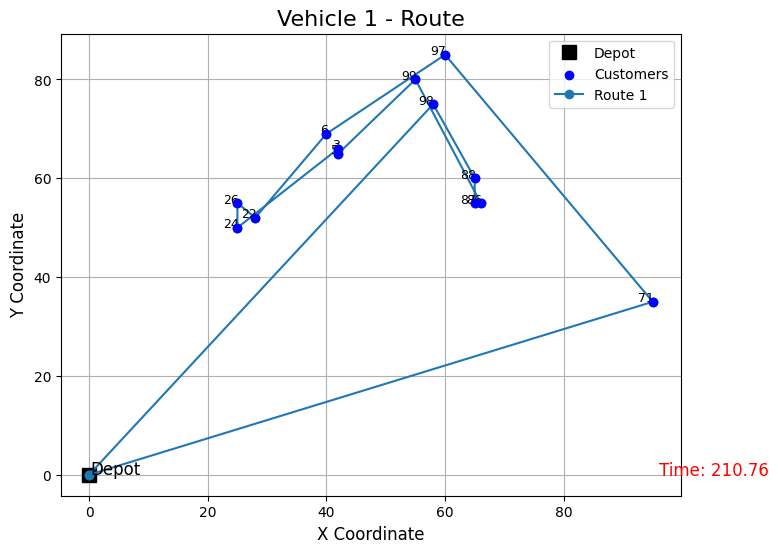

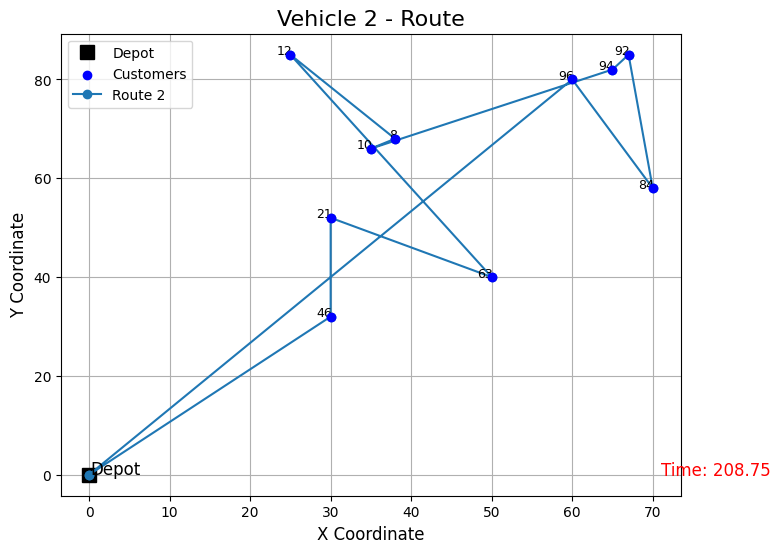

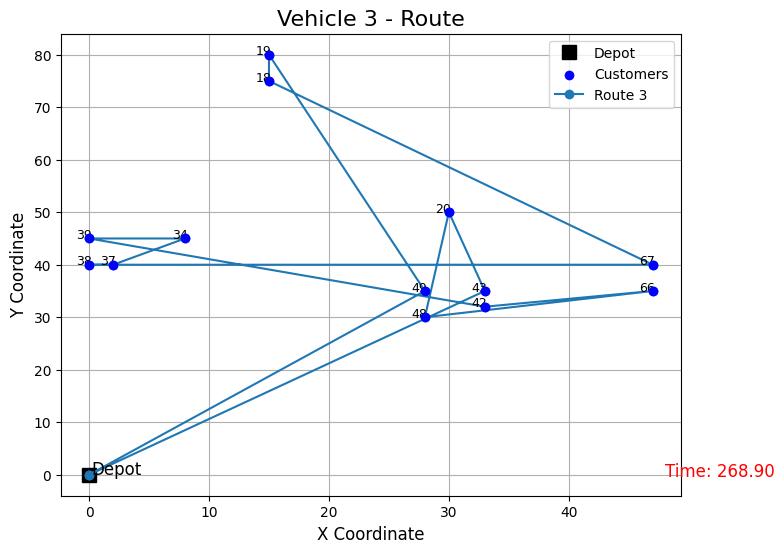

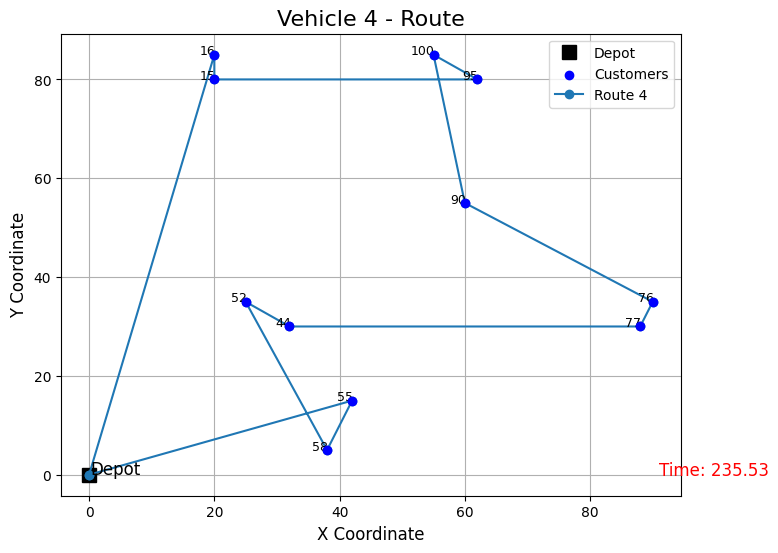

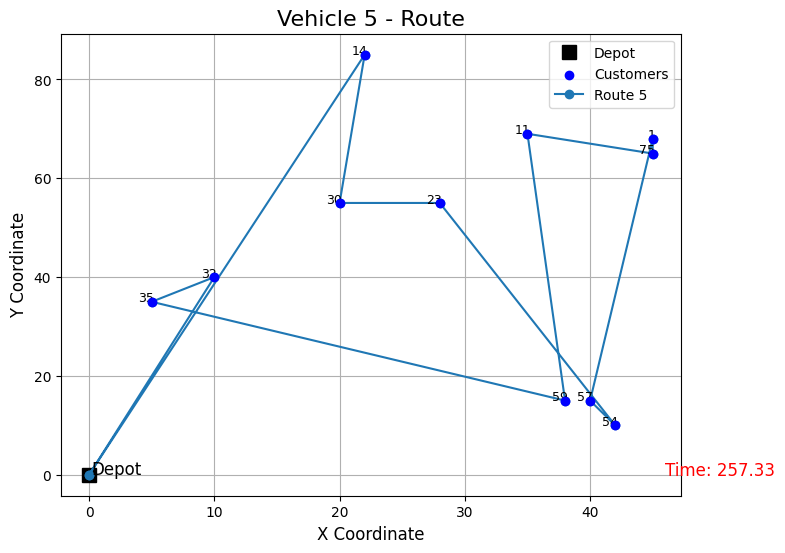

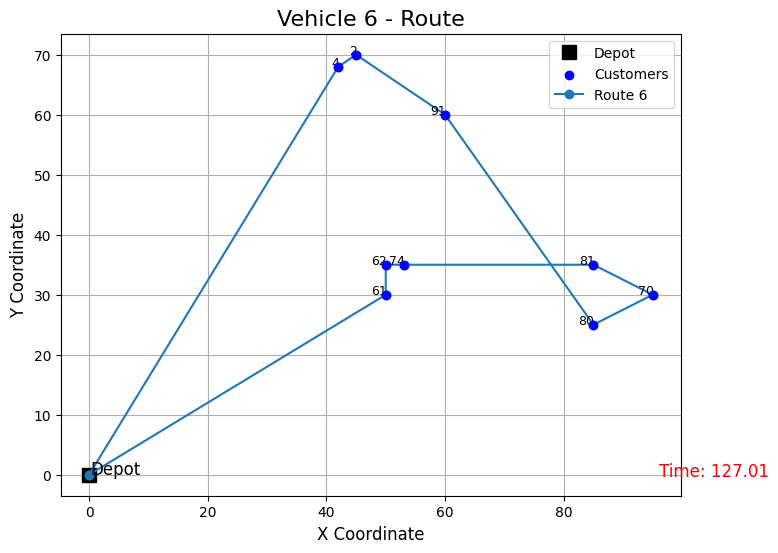

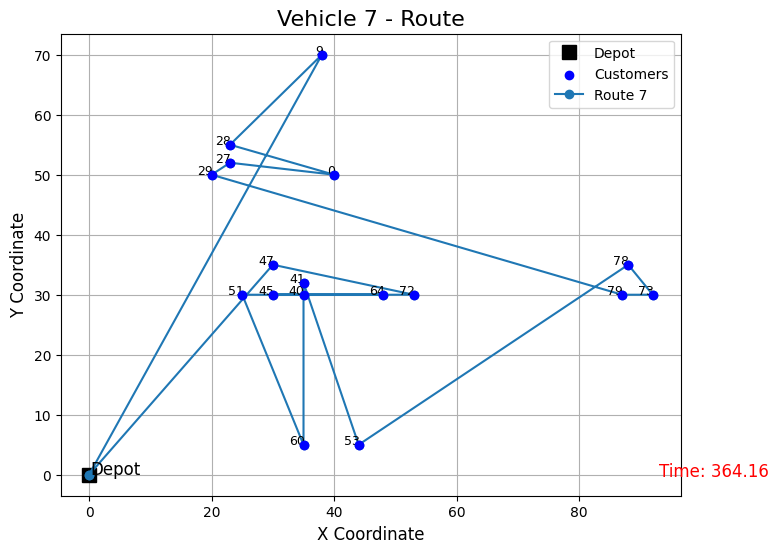

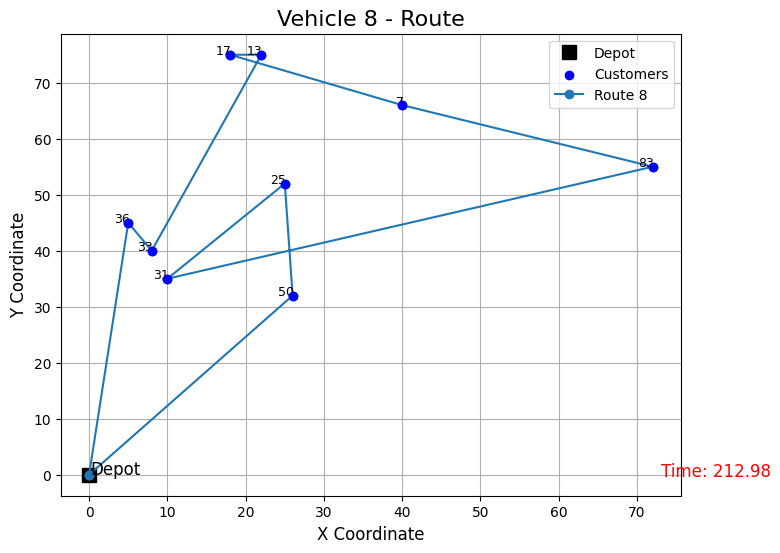

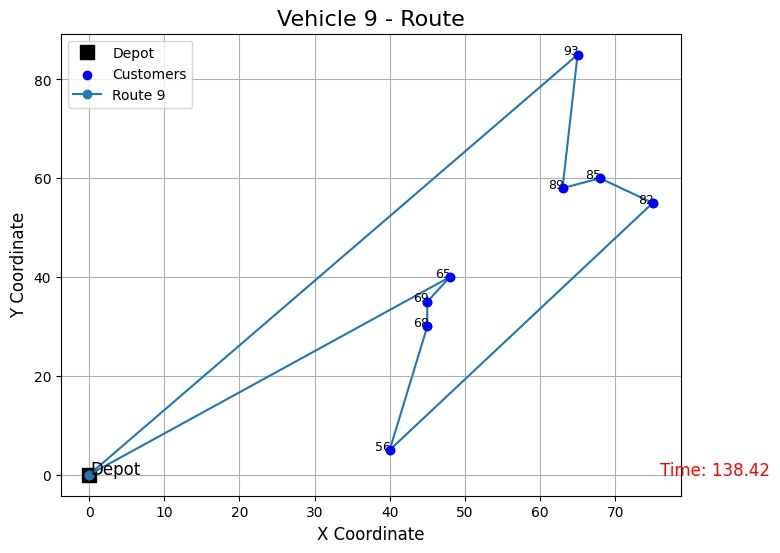

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate total time or distance for a given route
def calculate_route_time(route, dist_matrix):
    total_time = 0
    for i in range(len(route) - 1):
        total_time += dist_matrix[route[i]][route[i + 1]]  # Add travel time between customers
    return total_time

# Function to visualize the routes for each vehicle in a separate graph with time at bottom right
def plot_routes_separate(customers, routes, dist_matrix, depot=(0, 0)):
    """
    Plots the VRP solution routes for each vehicle in a separate graph, with time/distance displayed at the bottom right.
    
    :param customers: List of customers with 'id', 'x', 'y' attributes.
    :param routes: List of lists, where each sublist is a route containing customer IDs.
    :param dist_matrix: Distance matrix between customers, to calculate travel time.
    :param depot: Tuple (x, y) for the depot location, default is (0, 0).
    """
    # For each route (representing a vehicle), plot a separate graph
    for route_idx, route in enumerate(routes):
        plt.figure(figsize=(8, 6))
        
        # Plot the depot location
        plt.plot(depot[0], depot[1], 'ks', label="Depot", markersize=10)
        plt.text(depot[0] + 0.2, depot[1], 'Depot', fontsize=12, ha='left')
        
        # Plot customer locations for the current vehicle's route
        route_x = [customers[customer_id]['x'] for customer_id in route]
        route_y = [customers[customer_id]['y'] for customer_id in route]
        
        # Plot the customers for this route
        plt.scatter(route_x, route_y, c='b', label="Customers", zorder=5)
        
        # Label customer points
        for cust_id in route:
            plt.text(customers[cust_id]['x'] + 0.2, customers[cust_id]['y'], str(customers[cust_id]['id']), fontsize=9, ha='right')
        
        # Add the depot to the route
        route_x = [depot[0]] + route_x + [depot[0]]
        route_y = [depot[1]] + route_y + [depot[1]]
        
        # Plot the route for this vehicle
        plt.plot(route_x, route_y, marker='o', linestyle='-', label=f"Route {route_idx + 1}")
        
        # Calculate and display the time/distance taken by this route
        route_time = calculate_route_time(route, dist_matrix)
        route_time_label = f"Time: {route_time:.2f}"  # You can change this to "Distance" if needed
        
        # Display the time at the bottom right
        plt.text(max(route_x) + 1, min(route_y) - 1, route_time_label, fontsize=12, ha='left', va='bottom', color='red')
        
        # Set title and labels for each plot
        plt.title(f'Vehicle {route_idx + 1} - Route', fontsize=16)
        plt.xlabel('X Coordinate', fontsize=12)
        plt.ylabel('Y Coordinate', fontsize=12)
        plt.legend()
        plt.grid(True)
        
        # Display the plot
        plt.show()

# Function to extract routes from the best solution
def extract_routes(best_individual, customers, vehicle_capacity):
    routes = []
    total_demand = 0
    num_vehicles = 1
    routes.append([best_individual[0]])  # Add depot as the starting point of the first vehicle's route
    
    for i in range(1, len(best_individual)):
        current_customer = customers[best_individual[i - 1]]
        next_customer = customers[best_individual[i]]
        total_demand += current_customer['demand']
        
        # If capacity is exceeded, start a new vehicle route
        if total_demand > vehicle_capacity:
            num_vehicles += 1
            total_demand = next_customer['demand']
            routes.append([best_individual[i]])
        else:
            routes[-1].append(best_individual[i])
    
    return routes

# Function to solve the VRP with Time Windows using Genetic Algorithm
def solve_vrptw(file_path):
    vehicle_capacity, customers = parse_input(file_path)
    num_customers = len(customers)
    
    # Create distance matrix
    dist_matrix = np.zeros((num_customers, num_customers))
    for i in range(num_customers):
        for j in range(num_customers):
            dist_matrix[i][j] = calculate_travel_time(customers[i], customers[j])
    
    # Genetic algorithm parameters
    population_size = 50
    generations = 100
    mutation_rate = 0.1
    
    # Initialize population
    population = generate_initial_population(population_size, num_customers)
    
    # Evolve the population
    for gen in range(generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, dist_matrix, vehicle_capacity, customers)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            new_population.append(mutate(child1, mutation_rate))
            new_population.append(mutate(child2, mutation_rate))
        
        population = new_population
        
        # Track the best solution in this generation
        best_individual = min(population, key=lambda x: fitness(x, dist_matrix, vehicle_capacity, customers))
        print(f"Generation {gen + 1}, Best Fitness: {fitness(best_individual, dist_matrix, vehicle_capacity, customers)}")
    
    # Get the best individual from the final population
    best_individual = min(population, key=lambda x: fitness(x, dist_matrix, vehicle_capacity, customers))
    
    # Extract the routes from the best individual
    routes = extract_routes(best_individual, customers, vehicle_capacity)
    
    # Print and visualize the optimized routes
    print("\nOptimized Routes:")
    for i, route in enumerate(routes):
        print(f"Vehicle {i + 1}: {route}")
    
    # Visualize the routes with separate graphs for each vehicle, displaying time at the bottom right
    plot_routes_separate(customers, routes, dist_matrix, depot=(0, 0))

# Main function to select file and run the solver
file_path = select_file()

# Check if the user selected a file
if file_path:
    print(f"File selected: {file_path}")
    solve_vrptw(file_path)
else:
    print("No file selected. Exiting.")
